In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/final_dataset.csv", parse_dates=["timestamp"])

df.head()


,timestamp,load_actual,temperature,humidity,dew_point,solar_generation,wind_generation
0,2014-12-31 23:00:00,22734.0,7.5,81.0,4.5,50.0,5461.0
1,2015-01-01 00:00:00,22734.0,7.3,81.0,4.2,50.0,5461.0
2,2015-01-01 01:00:00,22734.0,7.0,81.0,3.9,50.0,5461.0
3,2015-01-01 02:00:00,21286.0,6.8,81.0,3.7,50.0,5238.0
4,2015-01-01 03:00:00,20264.0,6.9,79.0,3.5,42.0,4935.0


In [5]:
plt.style.use("seaborn-v0_8-darkgrid")


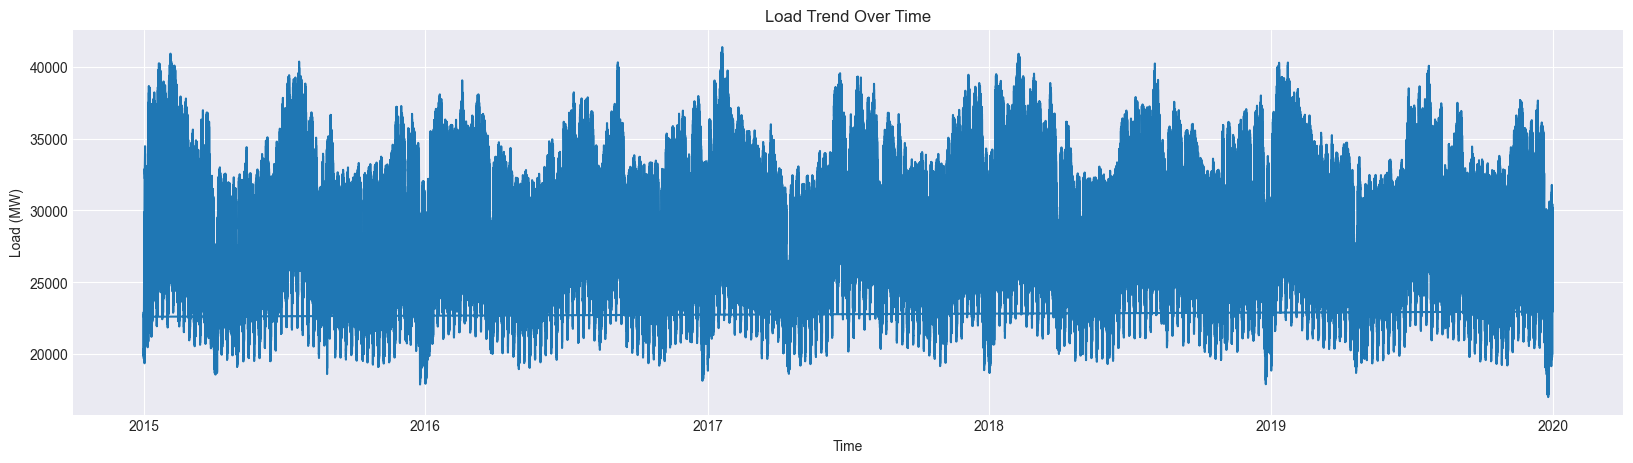

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df["timestamp"], df["load_actual"])
plt.title("Load Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.show()


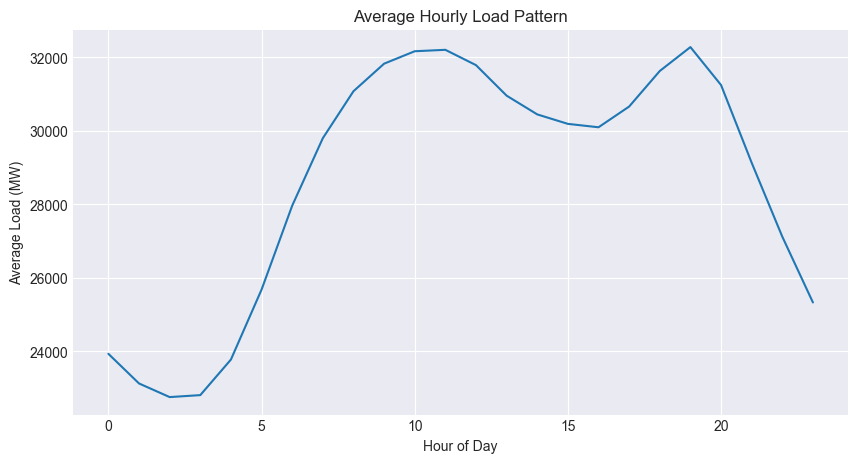

In [7]:
df["hour"] = df["timestamp"].dt.hour
hourly = df.groupby("hour")["load_actual"].mean()

plt.figure(figsize=(10,5))
hourly.plot(kind="line")
plt.title("Average Hourly Load Pattern")
plt.xlabel("Hour of Day")
plt.ylabel("Average Load (MW)")
plt.show()


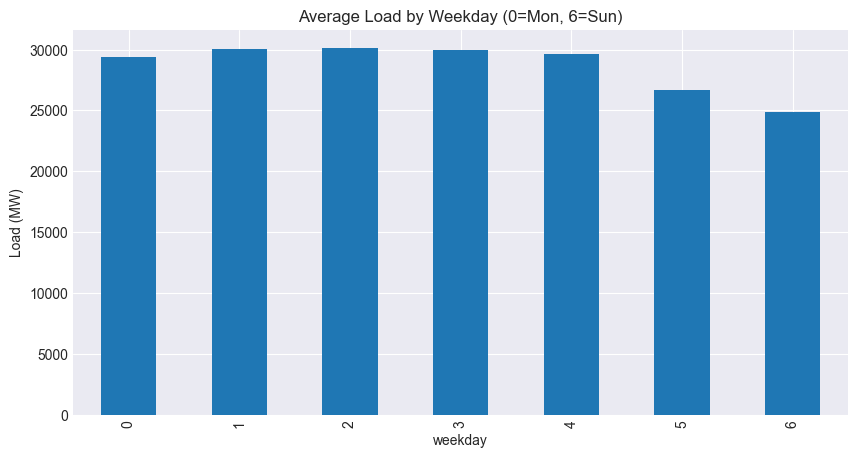

In [8]:
df["weekday"] = df["timestamp"].dt.weekday
weekday = df.groupby("weekday")["load_actual"].mean()

plt.figure(figsize=(10,5))
weekday.plot(kind="bar")
plt.title("Average Load by Weekday (0=Mon, 6=Sun)")
plt.ylabel("Load (MW)")
plt.show()


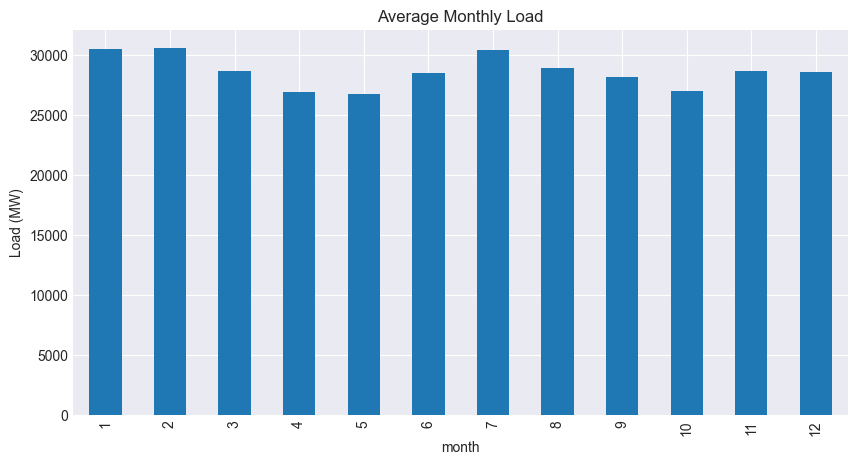

In [9]:
df["month"] = df["timestamp"].dt.month
monthly = df.groupby("month")["load_actual"].mean()

plt.figure(figsize=(10,5))
monthly.plot(kind="bar")
plt.title("Average Monthly Load")
plt.ylabel("Load (MW)")
plt.show()


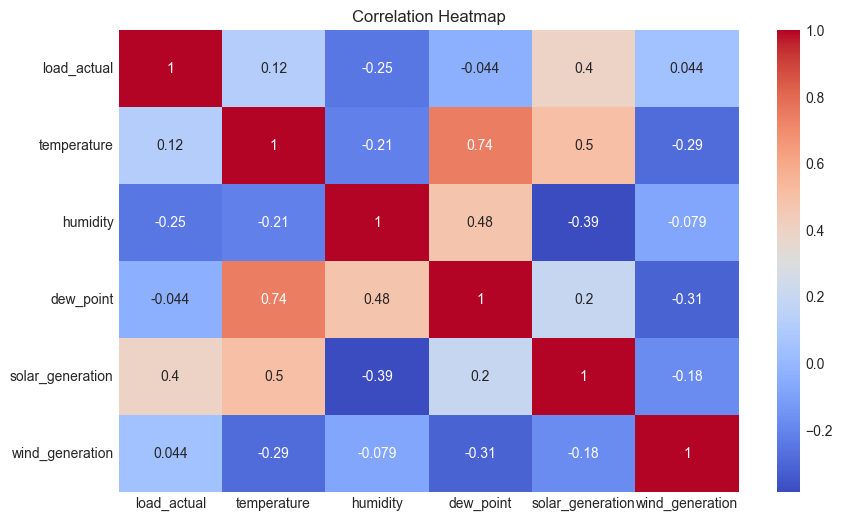

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df[[
    "load_actual", "temperature", "humidity", "dew_point",
    "solar_generation", "wind_generation"
]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


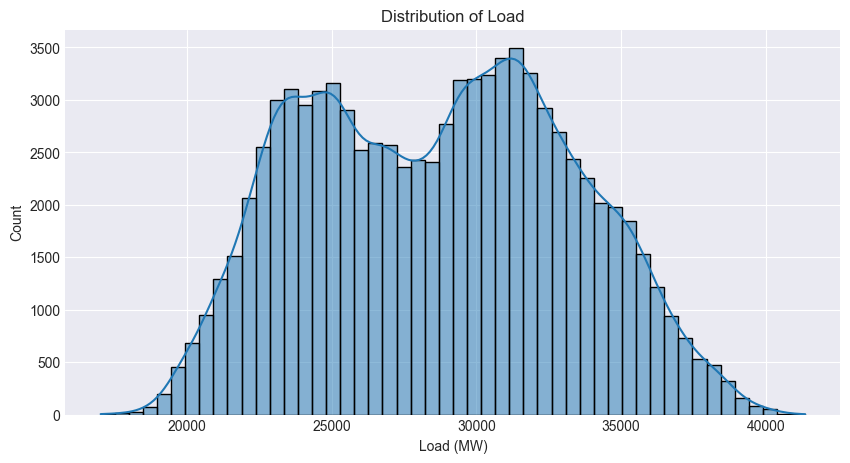

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["load_actual"], bins=50, kde=True)
plt.title("Distribution of Load")
plt.xlabel("Load (MW)")
plt.show()


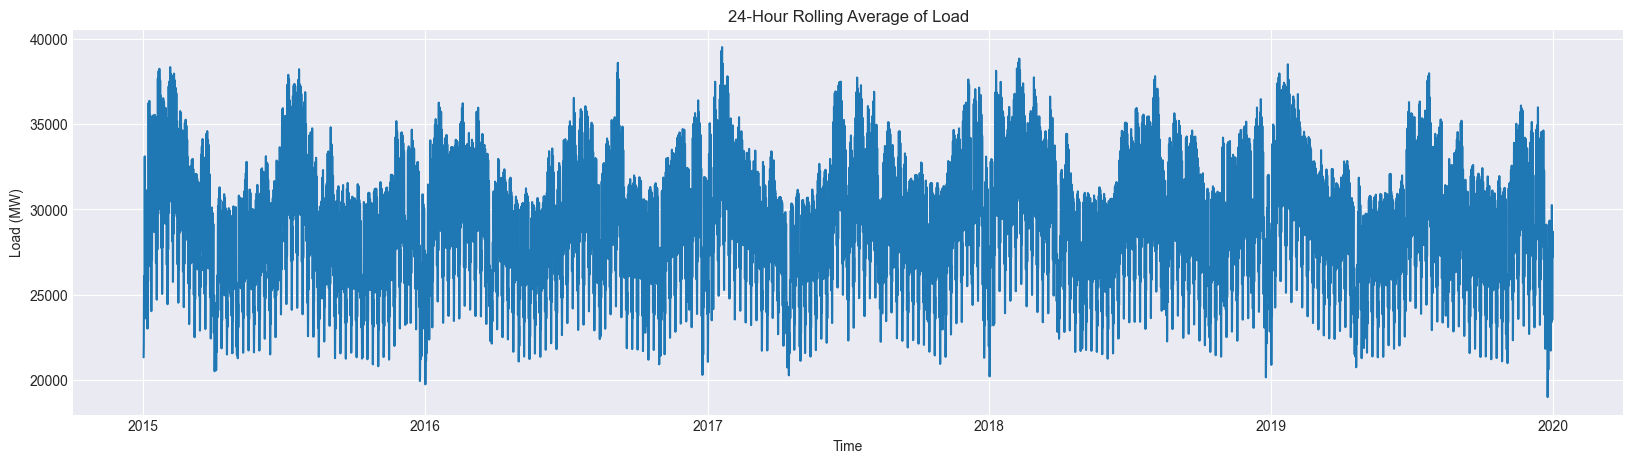

In [12]:
df_sorted = df.sort_values("timestamp")
df_sorted["rolling_24h"] = df_sorted["load_actual"].rolling(24).mean()

plt.figure(figsize=(20,5))
plt.plot(df_sorted["timestamp"], df_sorted["rolling_24h"])
plt.title("24-Hour Rolling Average of Load")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.show()
